<h2>KNN Classifier</h2>
<p>This dataset is a suedo dataset of spam/non-spam email with 57 dimensions with one binary target y.</p>
<p>The data consists of examples of spam and non-spam emails, of which there are 4508 training examples and 93 testing examples. The feature vector x is a 57-dimensional vector extracted from the email and y = 1 indicates a spam email. The data has been preprocessed such that the first 54-dimensions of each observation is binary and the last three dimensions are positive numbers.</p>

In [1]:
import pandas as pd
import numpy as np
PATH = 
train_x =pd.read_csv(PATH+'/X_train.csv',header=None)
train_y =pd.read_csv(PATH+'/y_train.csv',header=None)
test_x =pd.read_csv(PATH+'/X_test.csv',header=None)
test_y =pd.read_csv(PATH+'/y_test.csv',header=None)

train_x['y']=train_y
train_x_1 = train_x[train_x['y']==1]
train_x_0 = train_x[train_x['y']==0]

In [2]:
import random

train_x = np.array(train_x)
train_x_knn = list(map(lambda x: (x[-1],x[:-1]),train_x))
test_x = np.array(test_x)

def sum_diff(x,y):
    return sum(abs(x - y))

def knn_pred(x,k):
    #each row of train data has a value for the difference
    knn = list()
    for i in range(0,len(train_x)):
        knn.append((sum_diff(x,train_x_knn[i][1]),train_x_knn[i][0]))

    pred = np.sum(sorted(knn)[0:k],axis=0)[1]/k
    
    if pred > 0.5: return 1 
    elif pred == 0.5: return random.randint(0,1)
    else: return 0

    
def accuracy(actual,pred):
    return np.sum(np.array(actual).T==pred)/len(actual)

In [5]:
k_accuracy = []
for k in range(1,21):
    pred = [np.nan]*len(test_x)
    for i in range(0,len(test_x)):
        pred[i] = knn_pred(test_x[i],k)
    k_accuracy.append(accuracy(test_y,pred))

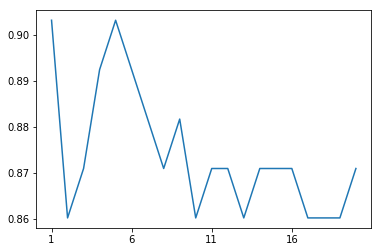

In [20]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.xticks(list(range(1,21,5)))
plt.plot(list(range(1,21,1)),k_accuracy)

In [ ]:
#when k=1 or 5, we have the highest outsample accuracy. Usually choose 5?